In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

In [2]:
request_df = pd.read_csv('hubNashville__311__Service_Requests.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
request_df['Date / Time Opened'] = pd.to_datetime(request_df['Date / Time Opened'])
request_df['Date / Time Opened']


0        2020-04-28 14:33:22
1        2020-04-28 21:46:53
2        2020-04-28 17:09:02
3        2020-04-28 20:50:36
4        2020-03-29 01:08:55
                 ...        
348666   2017-07-26 14:54:00
348667   2017-07-24 16:58:00
348668   2017-07-17 07:12:00
348669   2017-07-28 10:07:00
348670   2017-07-20 07:44:00
Name: Date / Time Opened, Length: 348671, dtype: datetime64[ns]

In [4]:
request_df['Request Origin'].unique()

array(['hubNashville Community', 'Phone', 'Mobile App', "Mayor's Office",
       "Council's Website", 'In Person at Event', 'Email',
       'Council Member', "Mayor's Website", 'OEM Case', 'Walk-In',
       'Social Media', 'USPS Letter'], dtype=object)

In [5]:
request_df['Date / Time Opened'] = pd.to_datetime(request_df['Date / Time Opened'])
request_df['Date / Time Opened'].head()
request_df['Date / Time Closed'] = pd.to_datetime(request_df['Date / Time Closed'])


In [6]:
request_df.columns = map(str.lower, request_df.columns)
request_df.columns = request_df.columns.str.replace(" ", "_")
request_df = request_df.rename(columns = {'request_#':'request_id',
                             'date_/_time_opened':'date_open',
                             'date_/_time_closed':'date_close'})



request_df.head()

,request_id,status,request_type,subrequest_type,additional_subrequest_type,date_open,date_close,request_origin,system_of_origin_id,contact_type,...,state_issue,parent_request,closed_when_created,address,city,council_district,zip,latitude,longitude,mapped_location
0,353977,Closed,COVID-19,COVID-19 - Submit Input about The Plan to Reop...,COVID-19 - Submit Input about The Plan to Reop...,2020-04-28 14:33:22,2020-04-28 14:33:22,hubNashville Community,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,354524,Closed,Quick Requests,Quick Requests,NaN,2020-04-28 21:46:53,2020-04-28 21:46:53,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,354188,Closed,Quick Requests,Quick Requests,NaN,2020-04-28 17:09:02,2020-04-28 17:09:02,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,354445,Closed,Quick Requests,Quick Requests,NaN,2020-04-28 20:50:36,2020-04-28 20:50:36,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,334893,Closed,Public Safety,Control Number Request for Towing,NaN,2020-03-29 01:08:55,2020-03-29 01:08:55,hubNashville Community,NaN,NaN,...,False,NaN,True,Long Hollow Pike & Northcreek Blvd,GOODLETTSVILLE,10.0,37072,36.32619,-86.700618,"(36.32619, -86.70061799999999)"


In [7]:
request_df['resolution_time'] = (request_df['date_close'])-(request_df['date_open'])
request_df.head()


,request_id,status,request_type,subrequest_type,additional_subrequest_type,date_open,date_close,request_origin,system_of_origin_id,contact_type,...,parent_request,closed_when_created,address,city,council_district,zip,latitude,longitude,mapped_location,resolution_time
0,353977,Closed,COVID-19,COVID-19 - Submit Input about The Plan to Reop...,COVID-19 - Submit Input about The Plan to Reop...,2020-04-28 14:33:22,2020-04-28 14:33:22,hubNashville Community,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days
1,354524,Closed,Quick Requests,Quick Requests,NaN,2020-04-28 21:46:53,2020-04-28 21:46:53,Phone,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days
2,354188,Closed,Quick Requests,Quick Requests,NaN,2020-04-28 17:09:02,2020-04-28 17:09:02,Phone,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days
3,354445,Closed,Quick Requests,Quick Requests,NaN,2020-04-28 20:50:36,2020-04-28 20:50:36,Phone,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days
4,334893,Closed,Public Safety,Control Number Request for Towing,NaN,2020-03-29 01:08:55,2020-03-29 01:08:55,hubNashville Community,NaN,NaN,...,NaN,True,Long Hollow Pike & Northcreek Blvd,GOODLETTSVILLE,10.0,37072,36.32619,-86.700618,"(36.32619, -86.70061799999999)",0 days


In [8]:
request_df['request_origin'].value_counts()

Phone                     244656
hubNashville Community     88649
Mobile App                 13051
Email                       1721
Mayor's Office               372
Council Member               129
Council's Website             50
Walk-In                       18
Mayor's Website                8
In Person at Event             6
USPS Letter                    5
Social Media                   5
OEM Case                       1
Name: request_origin, dtype: int64

In [9]:
request_df.update(request_df.select_dtypes(include=[np.float64, np.int64]).astype(str))


In [10]:
request_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348671 entries, 0 to 348670
Data columns (total 22 columns):
request_id                    348671 non-null object
status                        348671 non-null object
request_type                  348603 non-null object
subrequest_type               338024 non-null object
additional_subrequest_type    180510 non-null object
date_open                     348671 non-null datetime64[ns]
date_close                    338424 non-null datetime64[ns]
request_origin                348671 non-null object
system_of_origin_id           26398 non-null object
contact_type                  26129 non-null object
preferred_language            348671 non-null object
state_issue                   348671 non-null bool
parent_request                348671 non-null object
closed_when_created           348671 non-null bool
address                       285058 non-null object
city                          280771 non-null object
council_district              3

## Visualize geographical differences across time to completion/request type/other factors. Identify spikes/outliers/trends across different dimensions (time/request type/volume/etc.). Intention to help direct resources. Which area has the most activity to direct staff appropriately. (J, C, T, S, B)
### How do request types vary across different areas of the city? (use as way to educate population rather than treat a symptom) Impact of violations/requests regarding covid by council district


In [11]:
request_df.head(25)

,request_id,status,request_type,subrequest_type,additional_subrequest_type,date_open,date_close,request_origin,system_of_origin_id,contact_type,...,parent_request,closed_when_created,address,city,council_district,zip,latitude,longitude,mapped_location,resolution_time
0,353977,Closed,COVID-19,COVID-19 - Submit Input about The Plan to Reop...,COVID-19 - Submit Input about The Plan to Reop...,2020-04-28 14:33:22,2020-04-28 14:33:22,hubNashville Community,NaN,NaN,...,nan,True,NaN,NaN,nan,NaN,nan,nan,NaN,0 days 00:00:00
1,354524,Closed,Quick Requests,Quick Requests,NaN,2020-04-28 21:46:53,2020-04-28 21:46:53,Phone,NaN,NaN,...,nan,True,NaN,NaN,nan,NaN,nan,nan,NaN,0 days 00:00:00
2,354188,Closed,Quick Requests,Quick Requests,NaN,2020-04-28 17:09:02,2020-04-28 17:09:02,Phone,NaN,NaN,...,nan,True,NaN,NaN,nan,NaN,nan,nan,NaN,0 days 00:00:00
3,354445,Closed,Quick Requests,Quick Requests,NaN,2020-04-28 20:50:36,2020-04-28 20:50:36,Phone,NaN,NaN,...,nan,True,NaN,NaN,nan,NaN,nan,nan,NaN,0 days 00:00:00
4,334893,Closed,Public Safety,Control Number Request for Towing,NaN,2020-03-29 01:08:55,2020-03-29 01:08:55,hubNashville Community,NaN,NaN,...,nan,True,Long Hollow Pike & Northcreek Blvd,GOODLETTSVILLE,10.0,37072,36.326190000000004,-86.70061799999998,"(36.32619, -86.70061799999999)",0 days 00:00:00
5,334780,Closed,COVID-19,COVID-19 Questions,NaN,2020-03-28 14:17:51,2020-03-28 23:35:56,hubNashville Community,NaN,NaN,...,nan,False,NaN,NaN,nan,NaN,nan,nan,NaN,0 days 09:18:05
6,323093,Closed,"Streets, Roads & Sidewalks",Illegal Dumping,Roadway,2020-03-09 13:49:36,2020-03-16 21:13:59,Phone,NaN,NaN,...,nan,False,2600 Grovesnor Dr,ANTIOCH,28.0,37013,36.07597,-86.64903000000001,"(36.07597, -86.64903)",7 days 07:24:23
7,294849,In Progress,"Streets, Roads & Sidewalks",Tree Maintenance on right of way,Tree fell in road or on sidewalk,2020-01-17 16:39:26,NaT,Phone,NaN,NaN,...,nan,False,2419 Kimberly Dr,NASHVILLE,15.0,37214,36.20645,-86.68273,"(36.20645, -86.68273)",NaT
8,323303,Closed,"Trash, Recycling & Litter",Missed Pickup - Recycle Cart Service,Recycle - Curbside/Alley Missed Pickup,2020-03-09 16:26:34,2020-03-17 21:12:24,Phone,NaN,NaN,...,nan,False,1113 Holly St,NASHVILLE,6.0,37206,36.1763,-86.74882,"(36.1763, -86.74882)",8 days 04:45:50
9,295257,Assigned,Public Safety,Abandoned Vehicles,Integration Issue,2020-01-18 21:42:38,NaT,hubNashville Community,NaN,NaN,...,nan,False,2150 Brookview Dr,NASHVILLE,15.0,37214,36.1759,-86.69448,"(36.1759, -86.69448)",NaT


In [12]:
request_df=request_df.drop(request_df[request_df['council_district']=='nan'].index) 

In [13]:
request_df['resolution_time'].value_counts()

0 days 00:00:00     30119
0 days 00:01:00      3432
0 days 00:02:00       494
0 days 00:03:00       340
0 days 00:04:00       301
                    ...  
14 days 01:30:00        1
83 days 08:51:00        1
11 days 20:54:57        1
1 days 17:45:26         1
2 days 19:13:47         1
Name: resolution_time, Length: 66873, dtype: int64

In [14]:
district_order = request_df['council_district'].value_counts().to_frame(name='requests').reset_index()

In [15]:
district_order_25 = district_order.head(25)

In [16]:
district_order_25.columns = ['district', 'requests']
district_order_25.head(15)

,district,requests
0,19.0,18781
1,21.0,15931
2,6.0,14541
3,17.0,13453
4,5.0,12846
5,24.0,11674
6,7.0,11331
7,20.0,11322
8,15.0,11011
9,2.0,10750


<BarContainer object of 25 artists>

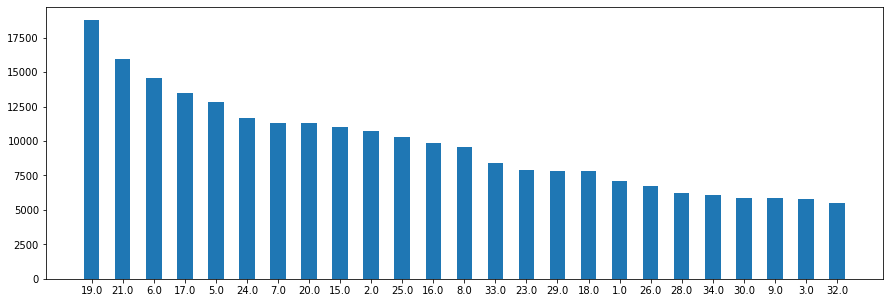

In [17]:
plt.figure(figsize=(15,5))
plt.bar('district', 'requests', width=.5, bottom=None, align='center', data=district_order_25)

In [18]:
council_location = gpd.read_file('../data/Council District Outlines (GIS).geojson')

In [19]:
council_location.head()

,first_name,email_address,business_phone_number,last_name,position,council_district,geometry
0,Jonathan B.,Jonathan.Hall@nashville.gov,615-432-1301,Hall,Council Member,1,"MULTIPOLYGON (((-86.90738 36.39052, -86.90725 ..."
1,Kyonzté,Kyonzte.Toombs@nashville.gov,615-432-1302,Toombs,Council Member,2,"MULTIPOLYGON (((-86.75902 36.23091, -86.75909 ..."
2,Jennifer,Jennifer.Gamble@nashville.gov,615-432-1303,Gamble,Council Member,3,"MULTIPOLYGON (((-86.76842 36.38358, -86.76824 ..."
3,Robert,Robert.Swope@nashville.gov,615-432-1304,Swope,Council Member,4,"MULTIPOLYGON (((-86.74489 36.05316, -86.74491 ..."
4,Sean,Sean.Parker@nashville.gov,615-432-1305,Parker,Council Member,5,"MULTIPOLYGON (((-86.74724 36.21041, -86.74243 ..."


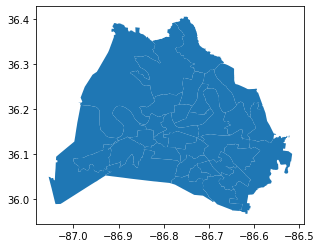

In [20]:
council_location.plot()

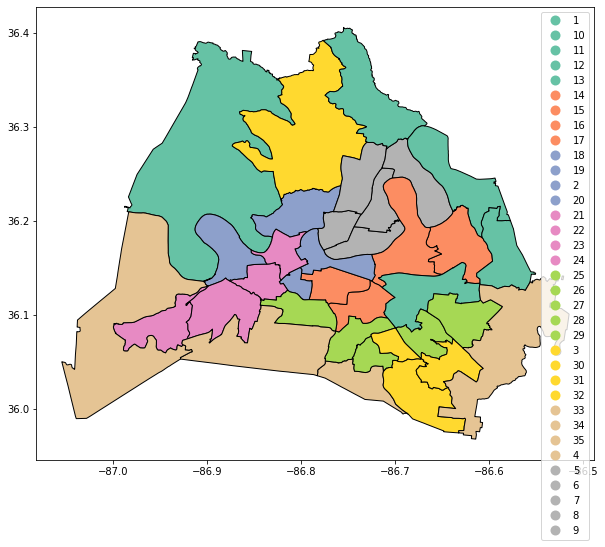

In [21]:
council_location.plot(column = 'council_district', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, 
              cmap = 'Set2')
plt.show()

In [26]:
request_df = request_df.groupby(['council_district', 'request_origin']).size().to_frame().reset_index()
request_df

,council_district,request_origin,0
0,1.0,Email,21
1,1.0,Mayor's Office,18
2,1.0,Mobile App,111
3,1.0,Phone,5780
4,1.0,Walk-In,1
...,...,...,...
215,9.0,Mayor's Office,1
216,9.0,Mobile App,167
217,9.0,Phone,3932
218,9.0,Walk-In,1
